# Importamos las librerías

In [1]:
import numpy as np
from sklearn.manifold import TSNE

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# Cargamos un modelo

In [2]:
w2v_sg = Word2Vec.load('./w2v_model.pkl')

In [4]:
w2v_sg.wv.most_similar('homer')

[('marge', 0.689924955368042),
 ('simpson', 0.6506073474884033),
 ('eliza', 0.6351875066757202),
 ('sorry', 0.6304112076759338),
 ('waylon', 0.6292034983634949),
 ('abe', 0.6262598037719727),
 ('refund', 0.6234241127967834),
 ('bongo', 0.6229503154754639),
 ('badly', 0.614257276058197),
 ('depressed', 0.6106959581375122)]

# Creamos _clusters_ de palabras con las más similares a unas dadas

In [17]:
keys = ['depressed','pregnant','university']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [18]:
print(word_clusters)

[['grownup', 'glamorous', 'becky', 'attract', 'script', 'whaddaya', 'suspicious', 'bored', 'forget', 'sure'], ['embarrass', 'raccoon', 'anyhoo', 'snuggle', 'ohh', 'badly', 'rude', 'harm', 'discipline', 'grownup'], ['yale', 'reading', 'determine', 'voter', 'harvard', 'recent', 'phase', 'surrender', 'attorney', 'correct']]


# Reducimos dimensionalidad a 2D para poder representar

In [19]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [20]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [21]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


# Visualización

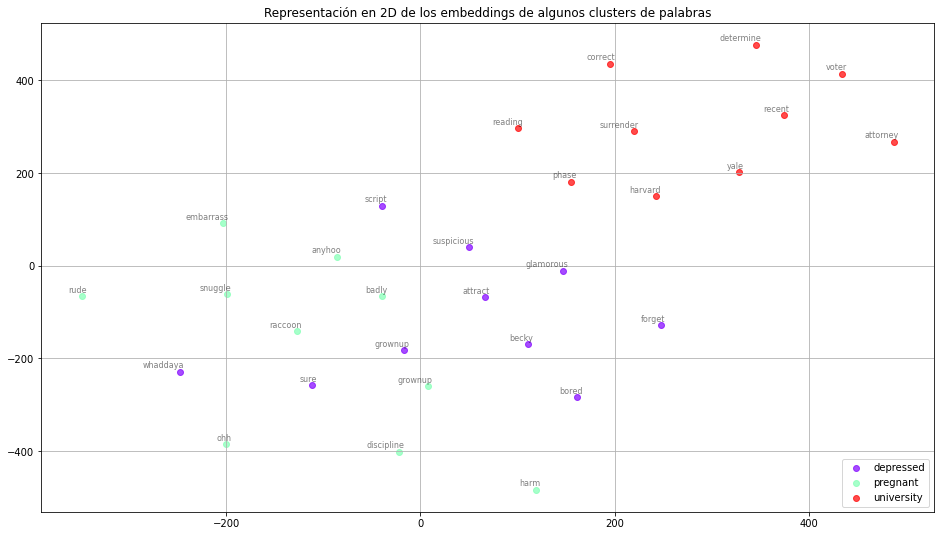

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## Embedding projector online

Permite cargar un fichero TSV con los word embeddings pre-calculados y representarlos en una representación interactiva en 3D. 

La reducción de dimensionalidad puede realizarse mediante UMAP, t-SNE o PCA.

Además, permite cargar los vectores con metadata como, por ejemplo, variables categóricas, que permitirán visualizar los topics / clusters en el espacio de 3D.

https://projector.tensorflow.org

<img src=https://i.ytimg.com/vi/y2rEqxzqOkM/maxresdefault.jpg>